In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
nx = 100
nt = 400
dt = 0.001
f0 = 50
t0 = 4. /f0

In [10]:
def dominant_frequency(s, dt):
    nfft = len(s)
    frq = np.fft.rfftfreq(nfft, dt)
    spec = np.abs(np.fft.rfft(s, nfft))
    print("dominant frequency =", frq[np.argmax(spec)])

In [11]:
time = np.linspace(0*dt, nt*dt, nt)
code = -2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))
book = -8 * (time - t0) * f0 * (np.exp(-1.0 * (time - t0) ** 2 / (4*f0) ** 2 ))

In [12]:
dominant_frequency(code, dt)
dominant_frequency(book, dt)

dominant frequency = 12.5
dominant frequency = 0.0


In [13]:
code.max(),code.min()

(42.86776642319736, -42.88632556740531)

In [14]:
book.max(),book.min()

(31.99999488000041, -127.99967232041944)

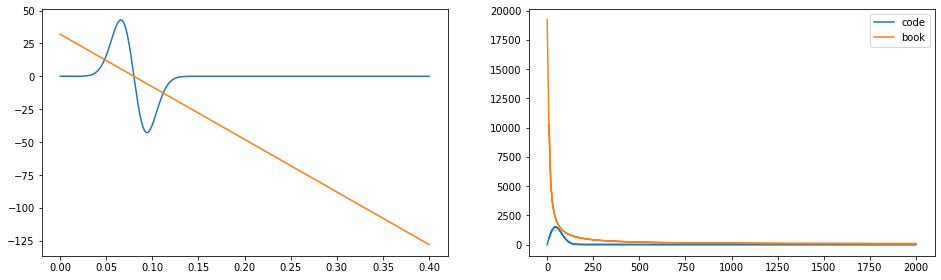

In [19]:
figure1 = plt.figure(figsize=(16,10))
ax1 = figure1.add_subplot(221)
ax1.plot(time, code, label='code')
ax1.plot(time, book, label='book')
ax2 = figure1.add_subplot(222)
spec_c = np.fft.fft(code) 
freq_c = np.fft.fftfreq(spec_c.size, d = dt / 4.) 
spec_b = np.fft.fft(book) 
freq_b = np.fft.fftfreq(spec_b.size, d = dt / 4.) 
ax2.plot(np.abs(freq_c), np.abs(spec_c), label='code') 
ax2.plot(np.abs(freq_b), np.abs(spec_b), label='book') 
plt.legend()
plt.show()